### Task: Analyzing Meteorological Data for New York Airports in 2013


### Introduction



In this notebook, we will explore and analyze hourly meteorological data for three major airports in New York: LaGuardia (LGA), John F. Kennedy (JFK), and Newark Liberty International (EWR). The dataset spans the entire year of 2013, providing information on various weather parameters, such as temperature, wind speed, precipitation, and more.

The primary objectives are to convert the data to the International System of Units (SI) or derived units, compute daily mean wind speeds for LGA, identify the ten windiest days at LGA, replace outliers, and visualize monthly mean wind speeds for all three airports.


### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_abbr

- `import numpy as np`: Imports NumPy, a library for numerical computing in Python, using the alias `np`.

- `import pandas as pd`: Imports Pandas, a library for data manipulation and analysis, using the alias `pd`.

- `import matplotlib.pyplot as plt`: Imports Matplotlib's Pyplot module, allowing for simple plotting functionalities, using the alias `plt`.

- `from calendar import month_abbr`: Imports the abbreviated month names from the Python standard library's `calendar` module.

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/Hp/Downloads/nycflights13_weather.csv/weather.csv')
df['time_hour'] = pd.to_datetime(df['time_hour'], format='%d-%m-%Y %H:%M') - pd.to_timedelta('1H')
df

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 00:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 01:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 02:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 03:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340.0,13.80936,15.891535,0.0,1017.1,10.0,2013-12-30 19:00:00
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330.0,17.26170,19.864419,0.0,1018.8,10.0,2013-12-30 20:00:00
26127,LGA,2013,12,30,21,32.00,15.08,49.19,340.0,14.96014,17.215830,0.0,1019.5,10.0,2013-12-30 21:00:00
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320.0,17.26170,19.864419,0.0,1019.9,10.0,2013-12-30 22:00:00


This code reads a CSV file named `nycflights13_weather.csv` from the specified path using the Pandas library in Python. The data in the CSV file is then loaded into a Pandas DataFrame. The DataFrame, named `df`, contains information about meteorological observations at three New York airports (LGA, JFK, and EWR) for the year 2013. The columns include details such as the origin (weather station), year, month, day, hour, temperature, humidity, wind speed, and other weather-related parameters.


### Data Preprocessing: Unit Conversion

In [3]:
# Convert columns to metric units
df['temp'] = (df['temp'] - 32) * 5/9
df['dewp'] = (df['dewp'] - 32) * 5/9
df['precip'] *= 25.4  # Convert inches to millimeters
df['visib'] *= 1.60934  # Convert miles to kilometers
df['wind_speed'] *= 0.44704  # Convert mph to m/s
df['wind_gust'] *= 0.44704  # Convert mph to m/s

This code converts specific columns in a Pandas DataFrame from imperial units to metric units:

-  `temp` and `dewp` columns are converted from Fahrenheit to Celsius.

- `precip` column representing precipitation is converted from inches to millimeters.

- `visib` column representing visibility is converted from miles to kilometers.

-  `wind_speed` and 'wind_gust' columns are converted from miles per hour (mph) to meters per second (m/s).

### Analyzing Daily Mean Wind Speeds at LaGuardia Airport in 2013

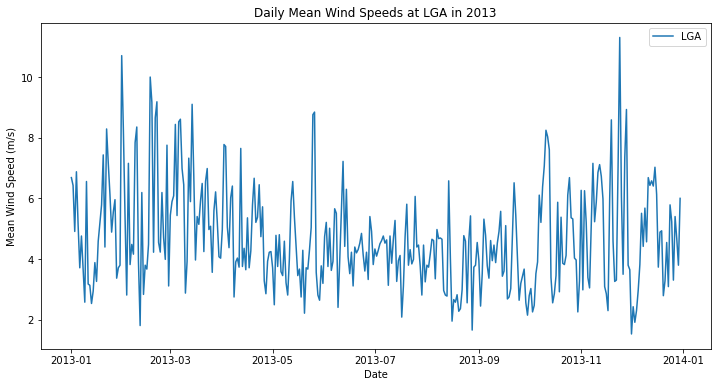

In [4]:
# Convert 'time_hour' to datetime
df['time_hour'] = pd.to_datetime(df['time_hour'])

# Compute daily mean wind speeds for LGA
daily_mean_wind_speeds = df[df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean()

# Resetting index
daily_mean_wind_speeds = daily_mean_wind_speeds.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(daily_mean_wind_speeds[['year', 'month', 'day']]), daily_mean_wind_speeds['wind_speed'], label='LGA')
plt.title('Daily Mean Wind Speeds at LGA in 2013')
plt.xlabel('Date')
plt.ylabel('Mean Wind Speed (m/s)')
plt.legend()
plt.show()

This code provides a visual representation of how daily mean wind speeds vary at LaGuardia Airport over the course of the year 2013.

- **Convert 'time_hour' to datetime:** Converts the 'time_hour' column to datetime format.
   

- **Compute daily mean wind speeds for LGA:** Calculates the mean wind speed for each day at LaGuardia Airport (LGA) in 2013.
   

- **Resetting index:** Resets the index for a clean structure.
   

- **Plotting:** Generates a line plot showing daily mean wind speeds at LGA throughout 2013. X-axis represents the date, Y-axis represents mean wind speed (m/s). Legend identifies the data as LaGuardia Airport.

### Top 10 Windiest Days at LaGuardia Airport

In [5]:
# Compute daily mean wind speeds for LGA airport
lga_daily_mean_wind = df[df['origin'] == 'LGA'].groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index()

In [6]:
# Identify the ten windiest days at LGA
windiest_days = lga_daily_mean_wind.nlargest(10, 'wind_speed')[['year', 'month', 'day', 'wind_speed']]

# Print the results with proper alignment
print(f"{'Date':<12} {'Wind_speed'}")
for _, row in windiest_days.iterrows():
    date_str = f"{int(row['year'])}-{int(row['month'])}-{int(row['day'])}"
    print(f"{date_str:<12} {row['wind_speed']:.6f}")

Date         Wind_speed
2013-11-24   11.317783
2013-1-31    10.717598
2013-2-17    10.010236
2013-2-21    9.192903
2013-2-18    9.174264
2013-3-14    9.109958
2013-11-28   8.938477
2013-5-26    8.852736
2013-5-25    8.766995
2013-2-20    8.659819


This code computes and prints the ten windiest days at LaGuardia Airport (LGA) in 2013, displaying the date and corresponding wind speed with proper alignment.

- **Compute daily mean wind speeds for LGA airport:** Calculates the daily mean wind speeds at LaGuardia Airport (LGA) by grouping the data by year, month, and day, and computing the mean of the 'wind_speed' column. The result is stored in the DataFrame `lga_daily_mean_wind`.
   

- **Identify the ten windiest days at LGA:** Selects the top 10 windiest days at LGA from the computed daily mean wind speeds using `nlargest` on the 'wind_speed' column. The relevant columns ('year', 'month', 'day', and 'wind_speed') are extracted and stored in the DataFrame `windiest_days`.
   

- **Print the results with proper alignment:** Prints the top 10 windiest days at LGA, displaying the date and corresponding wind speed. The results are formatted for proper alignment in the output.

### Monthly Mean Wind Speeds for NYC Airports (2013)

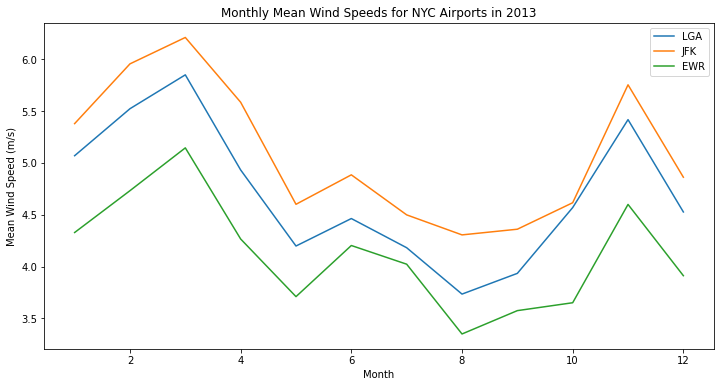

In [7]:
# Identify and replace the outlier with np.nan
outlier_index = df['wind_speed'].idxmax()
df.at[outlier_index, 'wind_speed'] = np.nan

# Compute monthly mean wind speeds for all three airports
monthly_mean_wind_speeds = df.groupby(['origin', df['time_hour'].dt.month])['wind_speed'].mean()

# Plotting
plt.figure(figsize=(12, 6))
for airport in ['LGA', 'JFK', 'EWR']:
    plt.plot(monthly_mean_wind_speeds[airport], label=airport)

plt.title('Monthly Mean Wind Speeds for NYC Airports in 2013')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed (m/s)')
plt.legend()
plt.show()

This code provides a visual comparison of the monthly mean wind speeds among the three New York City airports throughout the year 2013.


- **Identify and replace the outlier with np.nan:** Finds the index of the maximum wind speed value in the 'wind_speed' column and replaces it with NaN (Not a Number). This helps in handling outliers.

    
- **Compute monthly mean wind speeds for all three airports:** Groups the data by airport origin and month, then calculates the mean of the `wind_speed` column. The results are stored in the `monthly_mean_wind_speeds` DataFrame.

    
- **Plotting:** Generates a line plot illustrating the monthly mean wind speeds for the three NYC airports (LGA, JFK, EWR) in 2013. Each airport is represented by a different line on the plot. The x-axis represents the month, and the y-axis represents the mean wind speed in meters per second.



### Conclusion

To sum it up, looking into the NYC Flights 2013 weather data taught us some interesting things. We made the data easier to understand by using the metric system. Checking the daily wind speeds at LGA showed us how they changed throughout the year. Finding the top 10 windiest days helped us know when it was really windy. Looking at the average monthly wind speeds for different airports told us how they varied. Overall, this analysis gives us useful information that can be used in things like flying, building, and planning for emergencies.